# Tarefa 2 - Heart Attack Risk Prediction

### O Dataset
O Dataset <em>heart_attack_prediction_dataset.csv</em> tem como objetivo explorar as dinâmicas que influenciam a saúde do coração e os fatores que o preditam. 

Este dataset é constituído pelos seguintes parâmetros:

- **Patient ID** - Identificador único para cada paciente;

- **Age** - Idade do paciente;
- **Sex** - Género do paciente (Male/Female);
- **Cholesterol** - Níveis de colesterol do paciente;
- **Blood Pressure** - Pressão sanguínea do paciente (systolic/diastolic);
- **Heart Rate** - Frequência cardíaca do paciente;
- **Diabetes** - Se o paciente tem diabetes (Yes/No);
- **Family History** - Histórico familiar de doenças cardíacas (1: Sim, 0: Não);
- **Smoking** - Estado de fumador do paciente (1: Fumador, 0: Não Fumador);
- **Obesity** - Estado de obesidade do paciente (1: Obeso, 0: Não obeso);
- **Alcohol Consumption** - Nível de consumo de alcóol pelo paciente (None/Light/Moderate/Heavy);
- **Exercise Hours Per Week** - Número de horas de exercício por semana;
- **Diet** - Hábitos de alimentação do paciente (Healthy/Average/Unhealthy);
- **Previous Heart Problems** - Existência de histórico de problemas cardíacos (1: Sim, 0: Não);
- **Medication Use** - Uso de medicação por parte do paciente (1: Sim, 0: Não);
- **Stress Level** - Níveis de stress reportados pelo paciente (1-10);
- **Sedentary Hours Per Day** - Horas de atividade sedentária por dia;
- **Income** - Nível de rendimento do paciente;
- **BMI** - Índice de massa corporal do paciente;
- **Triglycerides** - Níveis de triglicerídeos do paciente;
- **Physical Activity Days Per Week** - Dias de atividade física por semana;
- **Sleep Hours Per Day** - Horas de sono por dia;
- **Country** - País do paciente;
- **Continent** - Continente onde o paciente reside;
- **Hemisphere** - Hemisfério onde o paciente reside;
- **Heart Attack Risk** - Presença de risco de ataque cardíaco (1 : Sim, 0: Não);

## Import Libraries

In [801]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

## Get the data

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [802]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

Imprimimos as primeiras linhas do dataframe.

In [803]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Em seguida, geramos as estatísticas descritivas:

In [804]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [805]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Verificamos se existem valores duplicados:

In [806]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


## Data Treatment

Remoção do atributo **Patient ID** por ser um atributo único em todos os registos.

In [807]:
data.drop(columns=['Patient ID'], inplace=True)

#### Label encoding do atributo **sex**

0 - Female

1 - Male

In [808]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data['Sex'] = lb.fit_transform(data['Sex'])

data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,1,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,0,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,1,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,1,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### Diet Treatment

0 - Unhealthy

1 - Average

2 - Healthy

In [809]:
print(data['Diet'].head())
replace_map = {'Diet': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2}}
predefined_order = ['Unhealthy', 'Average', 'Healthy']

labels = data['Diet'].astype('category').cat.categories.tolist()
labels = sorted(labels, key=lambda x: predefined_order.index(x))

replace_map_comp = {'Diet' : {k: v for k,v in zip(labels,list(range(len(labels))))}} 

data.replace(replace_map_comp, inplace=True)
data['Diet'].head()

0      Average
1    Unhealthy
2      Healthy
3      Average
4    Unhealthy
Name: Diet, dtype: object


0    1
1    0
2    2
3    1
4    0
Name: Diet, dtype: int64

#### Blood Presure Treatment

In [810]:
systolic = []
diastolic = []

for bp in data['Blood Pressure']:
    systolic.append(int(bp.split('/')[0]))
    diastolic.append(int(bp.split('/')[1]))

data.drop(columns=['Blood Pressure'], inplace=True)

data['Blood Pressure Systolic'] = systolic
data['Blood Pressure Diastolic'] = diastolic

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

#### Country, Continent and Hemisphere Treatment

In [811]:
data['Country'] = lb.fit_transform(data['Country'])
data['Continent'] = lb.fit_transform(data['Continent'])
data['Hemisphere'] = lb.fit_transform(data['Hemisphere'])


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

## Modeling

### Normalize and Split Features

In [812]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[data.drop(columns=['Heart Attack Risk']).columns]
y = data['Heart Attack Risk']

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)


### Árvore de decisão

In [813]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=2023)

starttime = time.process_time()

dtc.fit(X_train, y_train)
predictionDTC = dtc.predict(X_test)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")


Time spent: 0.12332617500001675 seconds



Accuracy Score: 0.5207667731629393

Precision Score: 0.33821733821733824

Recall Score: 0.35286624203821654

Roc Auc Score: 0.48368774406320497

F1 Score: 0.3453865336658354

Fbeta Score: 0.3410490027086925


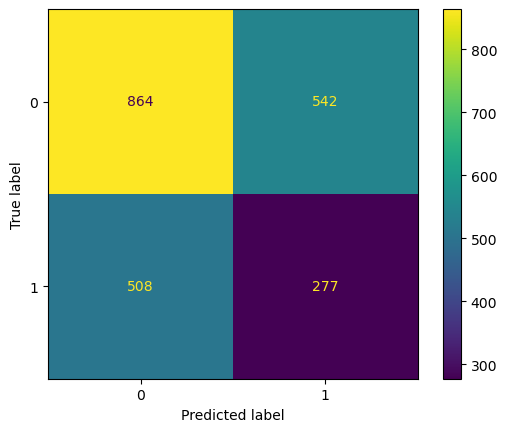

In [814]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print('\nAccuracy Score: ', end='')
print(accuracy_score(y_test, predictionDTC))

print('\nPrecision Score: ',end='')
print(precision_score(y_test, predictionDTC))

print('\nRecall Score: ', end='')
print(recall_score(y_test, predictionDTC))

print('\nRoc Auc Score: ', end='')
print(roc_auc_score(y_test, predictionDTC))

print('\nF1 Score: ', end='')
print(f1_score(y_test, predictionDTC))

print('\nFbeta Score: ', end='')
print(fbeta_score(y_test, predictionDTC, beta=0.5))

ConfusionMatrixDisplay.from_predictions(y_test, predictionDTC)
plt.show()

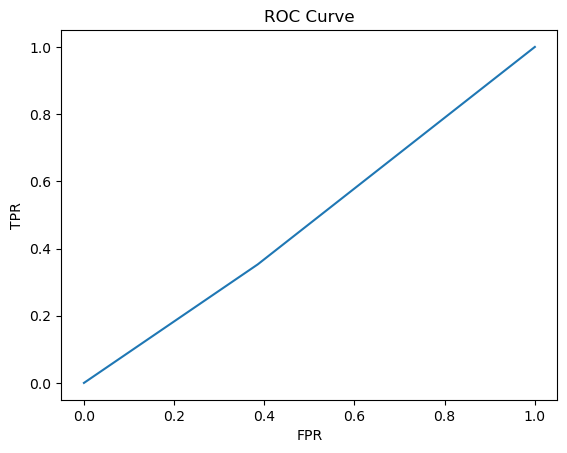

In [815]:
fpr, tpr, _ = roc_curve(y_test, predictionDTC)

plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

### Regressão Linear

In [816]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2023)

starttime = time.process_time()

dtr.fit(X_train, y_train)
predictionDTR = dtr.predict(X_test)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

Time spent: 0.10472899699999516 seconds


Mean Absolute Error: 0.478776814240073

Mean Squared Error: 0.478776814240073

Root Mean Squared Error: 0.6919370016410981


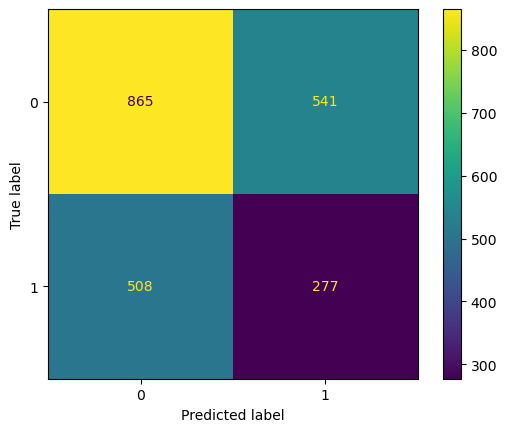

In [817]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionDTR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=False))

ConfusionMatrixDisplay.from_predictions(y_test, predictionDTR)
plt.show()

### Support Vector Classifier

In [818]:
from sklearn.svm import SVC

# O melhor kernel é o poly
svc = SVC(kernel='poly' ,random_state=2023)

starttime = time.process_time()

svc.fit(X_train, y_train)
predictionSVC = svc.predict(X_test)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

Time spent: 2.8180784639999956 seconds



Accuracy Score: 0.6120492925604747

Precision Score: 0.33668341708542715

Recall Score: 0.08535031847133757

Roc Auc Score: 0.49573348071504286

F1 Score: 0.13617886178861788

Fbeta Score: 0.2118912080961417


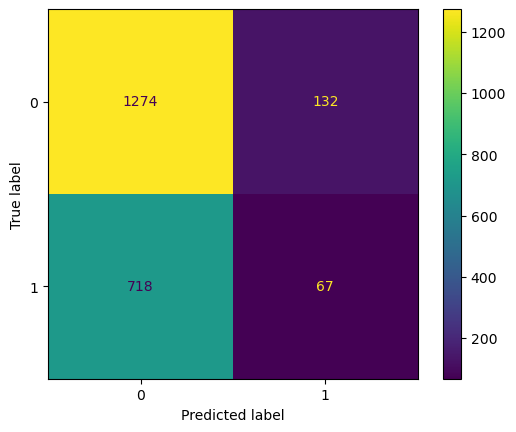

In [819]:
print('\nAccuracy Score: ', end='')
print(accuracy_score(y_test, predictionSVC))

print('\nPrecision Score: ',end='')
print(precision_score(y_test, predictionSVC))

print('\nRecall Score: ', end='')
print(recall_score(y_test, predictionSVC))

print('\nRoc Auc Score: ', end='')
print(roc_auc_score(y_test, predictionSVC))

print('\nF1 Score: ', end='')
print(f1_score(y_test, predictionSVC))

print('\nFbeta Score: ', end='')
print(fbeta_score(y_test, predictionSVC, beta=0.5))

ConfusionMatrixDisplay.from_predictions(y_test, predictionSVC)
plt.show()

### Support Vector Regressor

In [820]:
from sklearn.svm import SVR

# O melhor kernel é o poly
svr = SVR(kernel='rbf')

starttime = time.process_time()

svr.fit(X_train, y_train)
predictionSVR = svr.predict(X_test)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

Time spent: 4.129090641000005 seconds


Mean Absolute Error: 0.478776814240073

Mean Squared Error: 0.478776814240073

Root Mean Squared Error: 0.6919370016410981


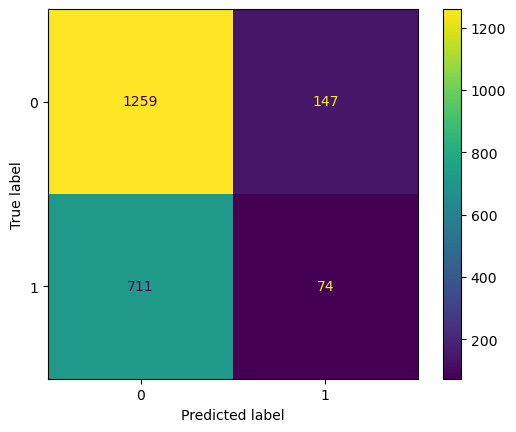

In [821]:
print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionDTR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=False))

predictionSVR = list(map(round,predictionSVR))

ConfusionMatrixDisplay.from_predictions(y_test, predictionSVR)
plt.show()